### In order to select appropriate model we should know something about the data we are dealing with!

--------------------------

### Test for Stationarity:

#### Dickey Fuller Test

#### Granger Causality Tests:

#### Evaluating Forecasts via Statistics

##### AIC:

##### BIC:

### Lets check out their implementations now:

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_csv('C:\\Users\\shaleens\\Desktop\\Projects\\TimeSeriesUdacity\\TS Udemy Vids\\Time Series 2\\Airlines.csv', index_col=0, parse_dates=True)
df1.index.freq = 'MS'

In [3]:
df1.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [4]:
df2 = pd.read_csv('C:\\Users\\shaleens\\Desktop\\Projects\\TimeSeriesUdacity\\TS Udemy Vids\\Time Series 2\\DailyFemaleBirths.csv', index_col=0, parse_dates=True)
df2.index.freq = "D"

In [5]:
df2.index

DatetimeIndex(['1959-01-01', '1959-01-02', '1959-01-03', '1959-01-04',
               '1959-01-05', '1959-01-06', '1959-01-07', '1959-01-08',
               '1959-01-09', '1959-01-10',
               ...
               '1959-12-22', '1959-12-23', '1959-12-24', '1959-12-25',
               '1959-12-26', '1959-12-27', '1959-12-28', '1959-12-29',
               '1959-12-30', '1959-12-31'],
              dtype='datetime64[ns]', name='Date', length=365, freq='D')

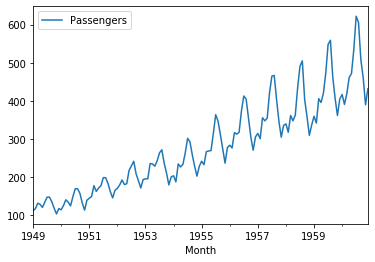

In [6]:
df1.plot()

### Augmented Dickey-Fuller Test:

##### Lets try the augmented dickey fuller test to check if this time series is stationary or not

In [7]:
# import augmented dickey fuller from statsmodels:

from statsmodels.tsa.stattools import adfuller

In [8]:
adfuller(df1['Passengers'])

(0.8153688792060543,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [10]:
help(adfuller)

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        data series
    maxlag : int
        Maximum lag which is included in test, default 12*(nobs/100)^{1/4}
    regression : {'c','ct','ctt','nc'}
        Constant and trend order to include in regression
    
        * 'c' : constant only (default)
        * 'ct' : constant and trend
        * 'ctt' : constant, and linear and quadratic trend
        * 'nc' : no constant, no trend
    autolag : {'AIC', 'BIC', 't-stat', None}
        * if None, then maxlag lags are used
        * if 'AIC' (default) or 'BIC', then the number of lags is chosen
          to minimize the corresponding information 

In [11]:
adfuller_result = adfuller(df1['Passengers'])

In [12]:
# Formatting the adfuller results to analyze it properly:

In [16]:
adf_stats = pd.Series(adfuller_result[0:4], index=['adf test stats','p-value', '# of lags', '# of observations'])

In [17]:
adf_stats

adf test stats         0.815369
p-value                0.991880
# of lags             13.000000
# of observations    130.000000
dtype: float64

In [18]:
for key,val in adfuller_result[4].items():
    adf_stats[f'critical value ({key})'] = val

In [19]:
adf_stats

adf test stats            0.815369
p-value                   0.991880
# of lags                13.000000
# of observations       130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
dtype: float64

##### We can observe, p-value>0.05, thus, we fail to reject the null hypothesis and can say that our Time Series data is non-stationary!


### To make it simple for using augmented dicky-fuller, lets create a simple function for it:

In [23]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, title=''):
    '''
    Pass in a time series and an optional title, function returns an ADF report
    '''
    print(f'Augmented Dickey-fuller test: {title}')
    result = adfuller(series.dropna(), autolag='AIC') # dropna() handles differenced data
    
    labels = ['adf test stats','p-value', '# of lags', '# of observations']
    out = pd.Series(result[0:4], index=labels)
    
    for key,val in result[4].items():
        out[f'critical value ({key})'] = val
    
    print(out.to_string())
    
    if result[1] <= 0.05:
        print("Null Hypothesis rejected! Time series is stationary!")
    else:
        print("Failed to reject Null Hypothesis! Time Series is not stationary!")

In [24]:
adf_test(df1['Passengers'], 'Airline Passengers Dataset')

Augmented Dickey-fuller test: Airline Passengers Dataset
adf test stats            0.815369
p-value                   0.991880
# of lags                13.000000
# of observations       130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
Failed to reject Null Hypothesis! Time Series is not stationary!


-----------------------------------------------------------------

### Lets check for df2 now on Female Births dataset:

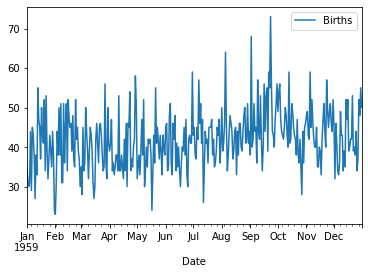

In [29]:
df2.plot()

In [31]:
adf_test(df2['Births'], 'Female Birth Dataset')

Augmented Dickey-fuller test: Female Birth Dataset
adf test stats           -4.808291
p-value                   0.000052
# of lags                 6.000000
# of observations       358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089
Null Hypothesis rejected! Time series is stationary!


-------------------------------------

### Granger Causality Test:

##### Lets now try the Granger Causality:

In [32]:
from statsmodels.tsa.stattools import grangercausalitytests

-----

### Lets explore the Seasonality with month and quarter plot:

In [46]:
df = pd.read_csv("C:\\Users\\shaleens\\Desktop\\Projects\\TimeSeriesUdacity\\TS Udemy Vids\\Time Series 2\\Airlines.csv", index_col=0, parse_dates=True)

In [47]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [48]:
df.index.freq = "MS"

In [49]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

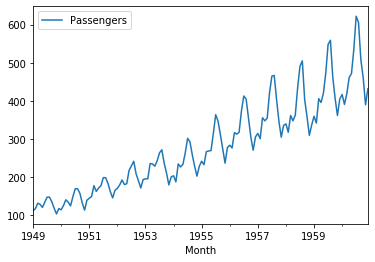

In [50]:
df.plot()

In [51]:
## It may be hard to tell when the seasonality is actually happening?!!
## So, to determine seasonality month and details:

In [52]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot

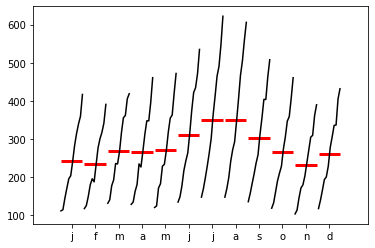

In [54]:
month_plot(df['Passengers']);
# Note that: we were able to call month_plot directly coz our data was already sampled as monthly data

In [59]:
df_quarter = df['Passengers'].resample(rule = 'Q').mean()

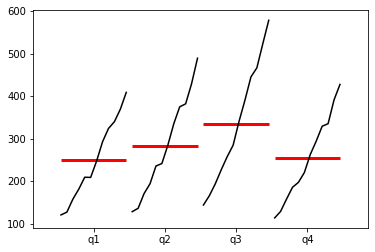

In [61]:
quarter_plot(df_quarter);